In [0]:
from fastai.vision import *
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path=untar_data(URLs.CAMVID)
path

PosixPath('/root/.fastai/data/camvid')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/camvid/images'),
 PosixPath('/root/.fastai/data/camvid/valid.txt'),
 PosixPath('/root/.fastai/data/camvid/labels'),
 PosixPath('/root/.fastai/data/camvid/codes.txt')]

In [0]:
#fname=get_image_files(path/'images')
#fname[:5]

In [0]:
fname=(path/'images').ls()
fname[:5]

[PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f01770.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_06330.png'),
 PosixPath('/root/.fastai/data/camvid/images/0006R0_f01830.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_04800.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_00930.png')]

In [0]:
lab=get_image_files(path/'labels')
lab[:5]

[PosixPath('/root/.fastai/data/camvid/labels/0016E5_04410_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0016E5_02280_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0006R0_f03630_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0016E5_08105_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/Seq05VD_f02640_P.png')]

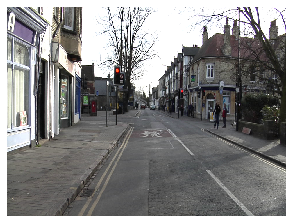

In [0]:
img=open_image(fname[0])
img.show(figsize=(5,5))

In [0]:
func=lambda x: path/'labels'/f'{x.stem}_P{x.suffix}'

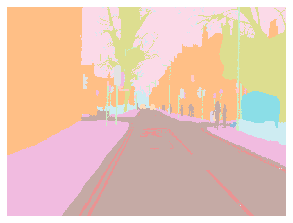

In [0]:
mask=open_mask(func(fname[0]))
mask.show(figsize=(5,5))

In [0]:
mask.data

tensor([[[ 4,  4,  4,  ..., 21, 21, 21],
         [ 4,  4,  4,  ..., 21, 21, 21],
         [ 4,  4,  4,  ..., 30, 21, 21],
         ...,
         [19, 19, 19,  ..., 17, 17, 17],
         [19, 19, 19,  ..., 17, 17, 17],
         [19, 19, 19,  ..., 17, 17, 17]]])

In [0]:
codes=np.loadtxt(path/'codes.txt',dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [0]:
size=np.array(mask.shape[1:])

In [0]:
temp_size=size//2

In [0]:
src=(SegmentationItemList.from_folder(path/'images')
    .split_by_fname_file(path/'valid.txt')
    .label_from_func(func,classes=codes))

In [0]:
data=(src.transform(get_transforms(),tfm_y=True,size=size)
     .databunch(bs=2).normalize(imagenet_stats))

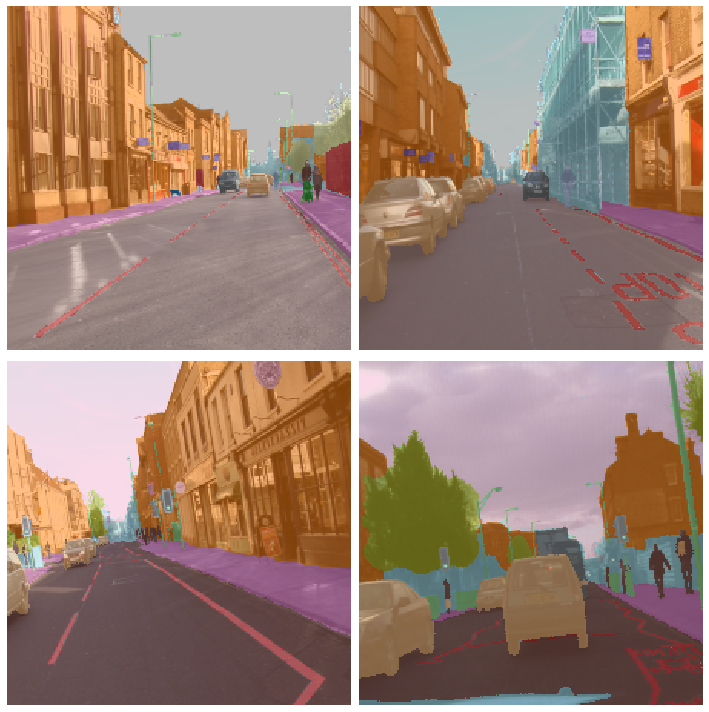

In [0]:
data.show_batch(3,figsize=(10,10))

In [0]:
data.classes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [0]:
data.c

32

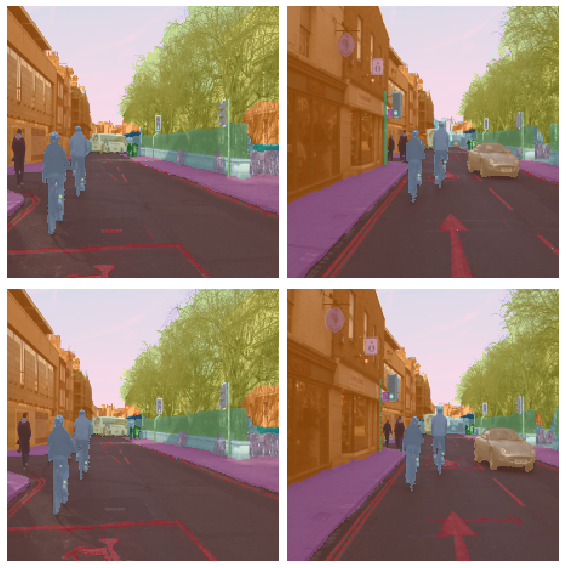

In [0]:
data.show_batch(3,DatasetType.Valid)

In [0]:
accuracy??

In [0]:
x={j:i for i,j in enumerate(codes)}
index=x['Void']
def acc_camvid(result,target):
    target = target.squeeze(1)
    mask=index!=target
    return (result.argmax(dim=1)[mask]==target[mask]).float().mean()

In [0]:
learn=unet_learner(data,models.resnet34,metrics=acc_camvid)

In [0]:
lr_find(learn)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


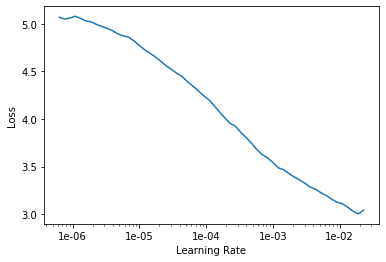

In [0]:
learn.recorder.plot()

In [0]:
lr=1e-4

In [0]:
learn.fit_one_cycle(10,slice(lr))

epoch,train_loss,valid_loss,acc_camvid,time
0,1.731490,1.291320,0.660272,00:40
1,0.942930,0.809778,0.813933,00:41
2,0.718738,0.651392,0.835000,00:40
3,0.624893,0.560555,0.842508,00:40
4,0.567516,0.507048,0.860925,00:39
5,0.507402,0.464569,0.870219,00:40
6,0.469751,0.451441,0.869316,00:39
7,0.451609,0.420714,0.880716,00:38
8,0.434643,0.406901,0.886356,00:38
9,0.423299,0.406389,0.886442,00:38


In [0]:
learn.save('/content/model-segmentation')

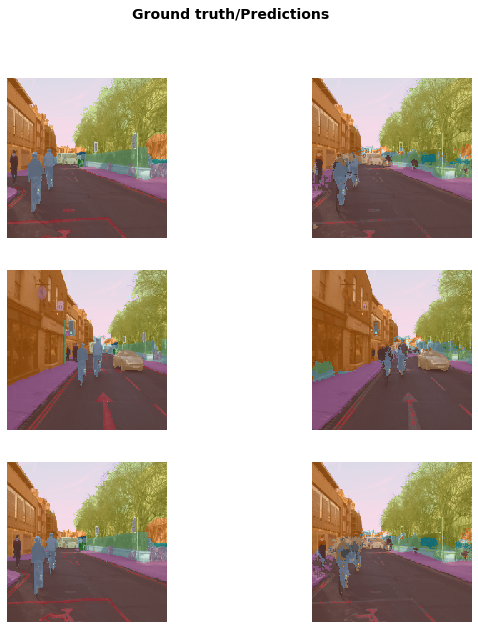

In [0]:
learn.show_results(rows=3,figsize=(10,10))

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


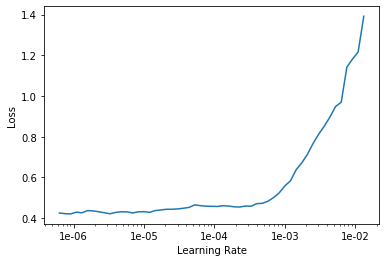

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(12,slice(1e-5,1e-4))

epoch,train_loss,valid_loss,acc_camvid,time
0,0.425777,0.404569,0.885918,00:38
1,0.445622,0.449498,0.871990,00:39
2,0.450571,0.398213,0.891061,00:39
3,0.442196,0.415654,0.882351,00:39
4,0.411575,0.433191,0.870318,00:39
5,0.388981,0.377174,0.893212,00:39
6,0.372756,0.393943,0.887029,00:39
7,0.348259,0.349421,0.901096,00:39
8,0.317828,0.335027,0.906167,00:39
9,0.324141,0.333617,0.905285,00:39


In [0]:
learn.save('/content/drive/My Drive/Segmentation/model-segmentation2')

In [0]:
learn.load('/content/model-segmentation2')

Learner(data=ImageDataBunch;

Train: LabelList (600 items)
x: SegmentationItemList
Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960)
y: SegmentationLabelList
ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960)
Path: /root/.fastai/data/camvid/images;

Valid: LabelList (101 items)
x: SegmentationItemList
Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960)
y: SegmentationLabelList
ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960)
Path: /root/.fastai/data/camvid/images;

Test: None, model=DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (

In [0]:
learn.freeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


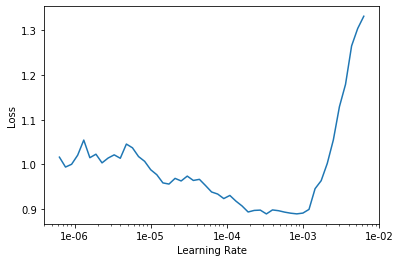

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(12,slice((1e-5)/2,(1e-3)/2))

epoch,train_loss,valid_loss,acc_camvid,time
0,0.170205,0.254112,0.932545,03:20
1,0.244129,0.254762,0.928846,03:20
2,0.276388,0.336045,0.901939,03:20
3,0.279782,0.276489,0.925052,03:20
4,0.270651,0.324403,0.918154,03:20
5,0.240697,0.287370,0.918520,03:20
6,0.219786,0.233034,0.936976,03:20
7,0.190174,0.239797,0.937553,03:20
8,0.177508,0.249841,0.937281,03:20
9,0.151233,0.248319,0.937427,03:20
